In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict



In [3]:
yelp_data = defaultdict(list)
zillow_data = defaultdict(list)

# create two sets of data (x)
yelp_data['yelp_x'] = np.linspace(2006, 2016, num=(2016-2006)*12)
zillow_data['zillow_x'] = np.linspace(2005, 2016, num=(2016-2005)*12)

# generating random y valus for yelp_data and zillow_data
temp_y = sorted(np.random.normal(10,5,(2016-2005)*12))
yelp_data['yelp_y'] = temp_y[12:]
zillow_data['zillow_y'] = temp_y

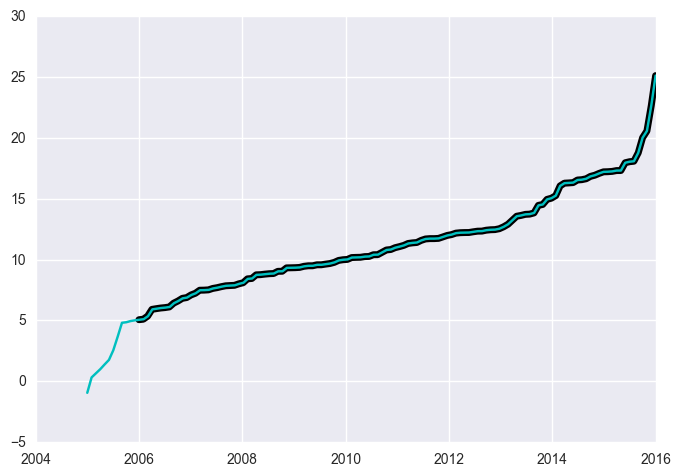

In [15]:
# Check out the two times series right now:
plt.figure()
plt.plot(yelp_data['yelp_x'],yelp_data['yelp_y'],c = 'k', linewidth = 5)
plt.plot(zillow_data['zillow_x'],zillow_data['zillow_y'],c = 'c')
plt.show()

In [16]:
# put both into dataframe
yelp_data = pd.DataFrame(yelp_data)
zillow_data = pd.DataFrame(zillow_data)

In [86]:
power = defaultdict(list)

def CrossCorrPlot (mon = 12, normalize = False):
    
    power['x_values'] = np.linspace(-mon, mon, num = (2*mon+1))
    
    normalizer = np.correlate(yelp_data['yelp_y'][(yelp_data['yelp_x']<=2015) & (yelp_data['yelp_x']>=2006)],
                            zillow_data['zillow_y'][(zillow_data['zillow_x']<=2015) & (zillow_data['zillow_x']>=2006)],
                            'valid')
    
    # print (normalizer)
    for p in power['x_values']:
            y = np.correlate(yelp_data['yelp_y'][(yelp_data['yelp_x']<=2015) & (yelp_data['yelp_x']>=2006)],
                            zillow_data['zillow_y'][(zillow_data['zillow_x']<=2015-p/12) & (zillow_data['zillow_x']>=2006-p/12)],
                            'valid')
            if normalize:
                power['y_values'].append(y/normalizer)
            else: 
                power['y_values'].append(y)
                
    if normalize:
        return pd.DataFrame(power), 1.0
    else:
        return pd.DataFrame(power), normalizer 
            
    
            

In [87]:
df, normalizer = CrossCorrPlot(12, True)

In [88]:
normalizer

1.0

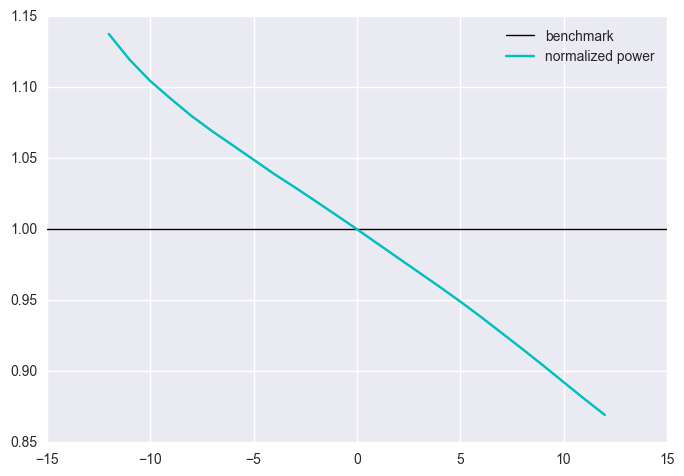

In [89]:
# Result if the trend is strictly increasing

fig = plt.figure()

plt.axhline(normalizer, lw = 1, c='k', label = 'benchmark') 
plt.plot(df['x_values'], df['y_values'], c = 'c', label = 'normalized power')
plt.legend()
plt.show()

In [206]:
# Result if the trend is strictly decreasing

'''
not finished

'''
fig = plt.figure()

plt.axhline(1, lw = 1, c='k', label = 'benchmark')
plt.plot(df['x_values'], df['y_values'], c = 'c', label = 'normalized power')
plt.legend()
plt.show()

array([ 12051.58890471])

In [156]:
# A more generalized version of the CrossCorrPlot function

def CrossCorrPlot2 (dfA, dfA_x, dfA_y, dfB, dfB_x, dfB_y, mon = 12, normalize = False):
    
    """
    A function that subjects two time series data frames to a cross correlation test, 
    producing a power plot whose x axis is the "τ", which indicates shifts in time and
    y axis is the value of power. The shifts, measured in months, can be customized.
    
    Note that, for the cross correlation to function well (?), it might be needed to 
    bin the time series so that the number of data points are the same (maybe I'm wrong).

    Parameters
    ----------
    dfA(B) : DataFrame
        the first(second) DataFrame to be used 
    dfA(B)_x : string
        the x values of dfA(B)
    dfA(B)_y : string
        the y values of dfA(B)
    mon : int
        the number of month that dfB will be shifted, both before and after
    normalize: boolean
        whether or not the normalize the power function to 1

    Returns
    -------
    pd.DataFrame(power) :
        the data frame of the resulting power function, w/ columns 'x_values' and 'y_values'
    1.0 or normalizer :
        for the axhline

    """
    power = defaultdict(list)
    power['x_values'] = np.linspace(-mon, mon, num = (2*mon+1))
    
    normalizer = np.correlate(dfA[dfA_y][(dfA[dfA_x]<=2015) & (dfA[dfA_x]>=2006)],
                            dfB[dfB_y][(dfB[dfB_x]<=2015) & (dfB[dfB_x]>=2006)],
                            'valid')
    
    for p in power['x_values']:
            y = np.correlate(dfA[dfA_y][(dfA[dfA_x]<=2015) & (dfA[dfA_x]>=2006)],
                            dfB[dfB_y][(dfB[dfB_x]<=2015-p/12) & (dfB[dfB_x]>=2006-p/12)],
                            'valid')
            print (2015-p/12)
            if normalize:
                power['y_values'].append(y/normalizer)
            else: 
                power['y_values'].append(y)
               
    if normalize:
        return pd.DataFrame(power), 1.0
    else:
        return pd.DataFrame(power), normalizer 




In [160]:
# Example:

test, nor = CrossCorrPlot2(yelp_data, 'yelp_x', 'yelp_y', zillow_data, 'zillow_x', 'zillow_y', mon = 12, normalize = True)

2016.0
2015.91666667
2015.83333333
2015.75
2015.66666667
2015.58333333
2015.5
2015.41666667
2015.33333333
2015.25
2015.16666667
2015.08333333
2015.0
2014.91666667
2014.83333333
2014.75
2014.66666667
2014.58333333
2014.5
2014.41666667
2014.33333333
2014.25
2014.16666667
2014.08333333
2014.0


In [161]:
test

,x_values,y_values
0,-12.0,[1.13734899638]
1,-11.0,[1.11934415371]
2,-10.0,[1.10431341829]
3,-9.0,[1.09172362424]
4,-8.0,[1.07964959122]
5,-7.0,[1.06893409149]
6,-6.0,[1.05896772829]
7,-5.0,[1.04892671208]
8,-4.0,[1.03883576066]
9,-3.0,[1.02944552336]


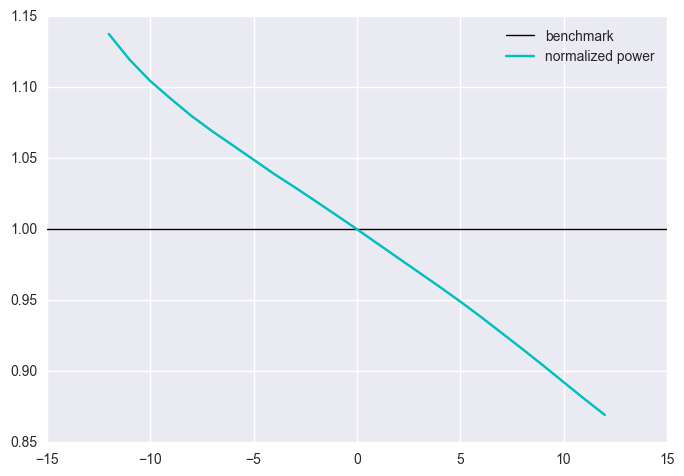

In [162]:
fig = plt.figure()

plt.axhline(nor, lw = 1, c='k', label = 'benchmark') 
plt.plot(test['x_values'], test['y_values'], c = 'c', label = 'normalized power')
plt.legend()
plt.show()